Product_Code    P1
Normalized 0  0.44
Normalized 1  0.50
Normalized 2  0.39
Normalized 3  0.28
Normalized 4  0.56


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


ValueError: Given a pandas object and the index does not contain dates

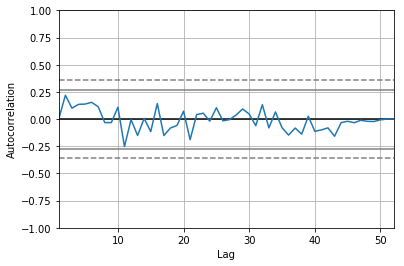

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats, linalg
from pandas import Series
from sklearn import preprocessing
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot

df = pd.read_csv(r"C:\Users\vx15\Downloads\Sales_Transactions_Dataset_Weekly.csv")

#select the columns with the normalized sales and use the product code as the index
normalized_cols = [col for col in df.columns if ('Normalize' in col or 'Product_Code' in col)]

#function to create a new dataframe with the select columns
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

#use function to extract normalized columns
normalized_df = select_columns(df,normalized_cols)


#Set index to product code to transpose the matrix properly
normalized_df.set_index('Product_Code',inplace=True)


#transpose the normalized matrix to compare product sales
normalized_dft = normalized_df.transpose()

#find the products' correlation matrix
corrMatrix = normalized_dft.corr()

#find the covariance matrix for the given dataframe
covarMatrix = normalized_dft.cov()
#print(covarMatrix)

#Create a dataframe consisting of the first product only
p1_analysis_cols = [col for col in normalized_dft.columns if ('Product_Code' in col or col == 'P1')]
p1_analysis_df = select_columns(normalized_dft,p1_analysis_cols)

print(p1_analysis_df.head())


#p1_analysis_df.plot()
#plt.xlabel('Time')
#plt.ylabel('Price')
#plt.grid()
#plt.xticks(np.arange(0, 60, step=5))

autocorrelation_plot(p1_analysis_df)
model = ARIMA(p1_analysis_df, order=(5,1,0))
model_fit = model.fit(disp=0)
